In [1]:
%matplotlib inline                  
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np
from numpy import *
import time
import matplotlib.cm as cm
plt.rcParams.update({'font.size': 18})
from mpl_toolkits.axes_grid1 import make_axes_locatable
import warnings

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

def plotit(xin,yin,y2in,vin,start,end,xname,yname,vname,titlename,savename,maxor,border,dots,both,background,xaxislog):    
    colormap = 'viridis'   #viridis
    value = 0.05
    xdots = xin[start:end]#np.sqrt(2*meandrot)#
    ydots = yin[start:end]
    y2dots = y2in[start:end]
    vdots = vin[start:end]
    count = 0; x = []; x.append(xdots[0])
    count2 = 0; y = []; y.append(ydots[0]); y2 = []; y2.append(y2dots[0])
    for i in range(len(xdots)):
        if xdots[i] > x[count]:
            x.append(xdots[i])
            count +=1
        if ydots[i] > y[count2]:
            y.append(ydots[i])
            y2.append(y2dots[i])
            count2 +=1
    xlength = len(x); ylength = len(y)
    z = np.zeros((ylength,xlength)); count = 0
    for i in range(xlength):
        for j in range(ylength):
            if count < num:
                z[j,i] = vdots[count]
                count += 1
            if count > num: z[j,i] = np.nan
    if dots == True: 
        if both == True: fig, ax1 = plt.subplots(figsize=(9,7))
        else: fig, ax1 = plt.subplots(figsize=(8,7))
    else: fig, ax1 = plt.subplots(figsize=(8,7))
    ax = plt.subplot(111)
    plt.title(titlename)
    if background == True:
        if both == True: im = ax.contourf(x,y,z,cmap=colormap,alpha=0.4)
        else: im = ax.contourf(x,y,z,cmap=colormap,alpha=0.6)
        im = ax.contour(x,y,z,cmap='gray')
    ax.set_xlabel(xname)#
    ax.set_ylabel(yname)
    ax.tick_params(axis='y')
    if border == True:
        ax.set_ylim([(1-value)*min(y),(1+value)*max(y)])
        ax.set_xlim([(1-value)*min(x),(1+value)*max(x)])
    if dots == True:
        im = ax.scatter(xdots,ydots,c=vdots,linewidths=5,marker='o',cmap=colormap)
        if border == False:
            ax.set_ylim([min(ydots),max(ydots)])
            ax.set_xlim([min(xdots),max(xdots)])
        else:
            ax.set_ylim([(1-value)*min(y2ots),(1+value)*max(ydots)])
            ax.set_xlim([(1-value)*min(xdots),(1+value)*max(xdots)])
    if both == True:
        ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
        im2 = ax2.contourf(x,y2,z,cmap=colormap,alpha=0.4)
        im2 = ax2.contour(x,y2,z,cmap='gray')
        ax2.set_ylabel('Delay N [frames]')  # we already handled the x-label with ax1
        ax2.tick_params(axis='y')
        if border == True:
            ax2.set_ylim([(1-value)*min(y2),(1+value)*max(y2)])
            ax2.set_xlim([(1-value)*min(x),(1+value)*max(x)])       
        pad1 = 1      
        divider2 = make_axes_locatable(ax2)
        cax2 = divider2.append_axes("right", size="5%", pad=1)
        plt.colorbar(im, cax=cax2)
    else: pad1 = 0.5        
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=pad1)
    plt.colorbar(im, cax=cax)
    plt.ylabel(vname)  
    if xaxislog == True: ax.set_xscale('log')
    line = np.linspace(min(xdots),max(xdots),1000)
    #ax.plot(line,line,'k--')
    plt.tight_layout()
    plt.savefig(savename+'.pdf', format='pdf')
    plt.savefig(savename+'.svg', format='svg')
    for i in range(len(vdots)):
        if maxor == True:
            if vdots[i] == max(vdots[:]): print('delay = ',round(delaywave[i],2),'s - noise = ',round(xdots[i],2),' - max',vname,'= ',round(min(vdots),2))
        else:
            if vdots[i] == min(vdots[:]): print('delay = ',round(delaywave[i],2),'s - noise = ',round(xdots[i],2),' - min',vname,'= ',round(min(vdots),2))
    plt.show()

In [3]:
filestart = '0'
fileend = '49'
folder = '.'

datageneral = np.loadtxt(r''+str(folder)+'/DataGeneral'+str(filestart)+'.txt')
dt = datageneral[0]
pxtomum = datageneral[1]
offset = datageneral[2]
videosize = datageneral[3]
boundaryradius = datageneral[4]

dt = 0.05196
#videosize = 800        #800, 521, 256, 128
binning = 1
frametransfer = False
flashtime = 0.01
verticalshift = 1.9176e-6
dtprogram = 6.3e-3
dtcamtoPC = 1e-3
dtPCtoADwin = 1e-3

R = 2.19e-6/2
T = 273.15+22
kB = 1.38064852e-23
eta=2.414e-5*10**(247.8/(T-140))
D_0 = kB*T/(6*np.pi*eta*R)

In [4]:
folder = './DataImportant'
#folder2 = './DataCompareInAndOut'
folder3 = './DataRadial'
num = int(fileend)-int(filestart)+1
delaywave = np.zeros((num,2));anglewave = np.zeros(num)
dataimportant = np.loadtxt(r''+str(folder)+'/Dataimportant'+str(filestart)+'.txt')
lengthimportant = len(dataimportant)
allimportant = np.zeros((lengthimportant,num))           #0 - average distance to center; 1 - hits of the boundary

for i in range(num):
    file = int(int(filestart)+i)
    data2 = np.loadtxt(r''+str(folder)+'/Dataimportant'+str(file)+'.txt')
    #0 - mean distance to center, 1 - boundary hits, 2 - mean angle change, 3 - countin, 4 - noise, 5 - delay, 
    #6 - reorientation time, 7 - mean of the propability, 8 - sd density, 9/10 - Drot/err, 11/12 - Drotexp/err, 
    #13/14 - ptime/err, 15/16 - plength/err, 17/18 - radialdistmore in/out, 19 vmax, 
    #20 meantime, 21 meanprob, 22 notone, 23 zero 
    data2 = np.asarray(data2)
    allimportant[:,i] = data2
    
rows = 1; steps = 1; check = True
for i in range(1,num):
    if check == True:
        if allimportant[2,i] == allimportant[2,i-1]:
            steps += 1
    if allimportant[2,i] != allimportant[2,i-1]:
            check = False
            rows += 1
print('steps = ',steps,' - rows = ',rows)

delaywave = np.zeros(num)
dtframetransfer = videosize/binning * verticalshift
dtreadout = (1032/27e6+verticalshift)*videosize/binning
for i in range(num): 
    dtexphalf = flashtime/2
    dttotal = dtexphalf + dtframetransfer + dtreadout + dtcamtoPC + dtprogram + dtPCtoADwin
    delaywave[i] = dttotal + (allimportant[1,i]-1)*dt
timewave = np.zeros(num)
for i in range(num): timewave[i] = 51e-3*10000*i/(60*60)   
for i in range(num):
    if allimportant[13,i] == 666: allimportant[13,i] = np.nan  
        
#print(allimportant[4,:])
#print(allimportant[5,:])

#for i in range(num): print('i = ',i,' - ',allimportant[4,i],' - ',allimportant[5,i])

steps =  10  - rows =  5


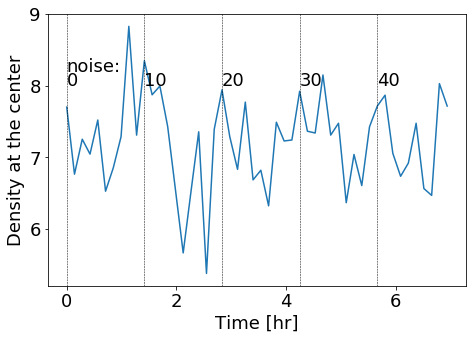

In [5]:
fig=plt.figure(1, figsize = (7.5,5) )
plt.subplot(1,1,1)
plt.plot(timewave,allimportant[4,:],label = 'mean density')  #mean density
#plt.plot(timewave,allimportant[0,:],label = 'mean')  #mean 
printnum = 0
for i in range(len(timewave)):
    if i % steps == 0:
        plt.axvline(x=timewave[i],linewidth=0.5, color = 'k',linestyle='--')
        plt.text(timewave[i],8,printnum)
        printnum += 10
plt.text(timewave[0],8.2,'noise:')
plt.xlabel('Time [hr]')
plt.ylabel('Density at the center')
#plt.ylabel('Distance [µm]')
#plt.legend()
plt.savefig('Density at the center 2.pdf', format='pdf')
plt.show()

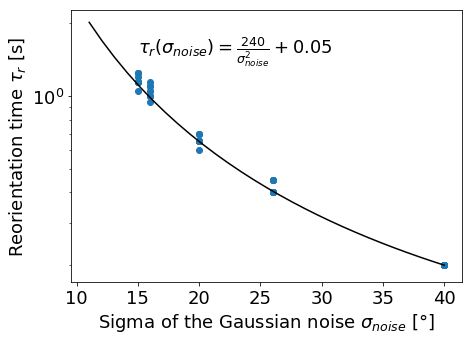

In [6]:
#0 - mean distance to center, 1 - boundary hits, 2 - mean angle change, 3 - countin, 4 - noise, 5 - delay, 
#6 - reorientation time, 7 - mean of the propability, 8 - sd density, 9/10 - Drot/err, 11/12 - Drotexp/err, 
#13/14 - ptime/err, 15/16 - plength/err, 17/18 - radialdistmore in/out, 19 vmax, 
#20 meantime, 21 meanprob, 22 notone, 23 zero 

def reorientationtimefit2(x, A, tau, y0):
    return A*x**(-tau)+y0
    
datarotation = np.linspace(10,40,30)

start = 0
fig=plt.figure(1, figsize = (7,5) )
plt.scatter(allimportant[2,start:],allimportant[3,start:])
plt.plot(datarotation[1:],reorientationtimefit2(datarotation[1:],240,2,0.05),color='k')
plt.text(15,1.5,r'$\tau_{r}(\sigma_{noise}) = \frac{240}{\sigma_{noise}^{2}}+0.05$')
plt.yscale('log')
plt.xlabel(r'Sigma of the Gaussian noise $\sigma_{noise}$ [°]')
plt.ylabel(r'Reorientation time $\tau_{r}$ [s]')
plt.savefig('Reorientationtime vs sigma.pdf', format='pdf')
plt.show()

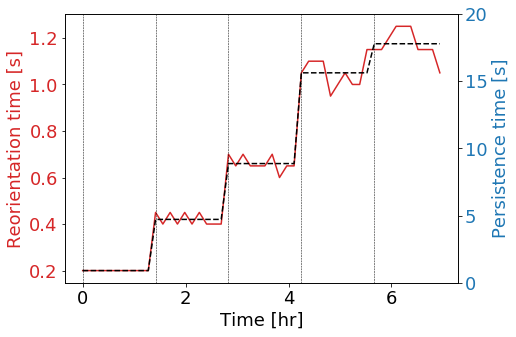

In [7]:
meandrot = np.zeros(num)
for i in range(rows):
    #meandrot[i*number:i*number+number] = stat.mode(1/np.sqrt(allimportant[6,i*number:i*number+number]))
    with warnings.catch_warnings():
        warnings.simplefilter("error")
        try: meandrot[i*steps:i*steps+steps] = stat.mode(allimportant[3,i*steps:i*steps+steps])
        except: meandrot[i*steps:i*steps+steps] = np.nanmean(allimportant[3,i*steps:i*steps+steps])

fig=plt.figure(1, figsize = (7.5,5) )
ax1 = plt.subplot(1,1,1)
color = 'tab:red'
ax1.set_xlabel('Time [hr]')
ax1.set_ylabel('Reorientation time [s]', color=color)
ax1.plot(timewave,allimportant[3,:], color=color)
for i in range(len(timewave)):
    if i % steps == 0:
        plt.axvline(x=timewave[i],linewidth=0.5, color = 'k',linestyle='--')
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(timewave,meandrot,c='k',linestyle='--')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Persistence time [s]', color=color)  # we already handled the x-label with ax1
#ax2.plot(timewave,allimportant[14,:], color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.ylim([0,20])
plt.tight_layout()
plt.savefig('Reorientationtime.pdf', format='pdf')
plt.show()

delay =  1.88 s - noise =  15.0  - max delay =  1.0
delay =  1.88 s - noise =  16.0  - max delay =  1.0
delay =  1.88 s - noise =  20.0  - max delay =  1.0
delay =  1.88 s - noise =  26.0  - max delay =  1.0
delay =  1.88 s - noise =  40.0  - max delay =  1.0


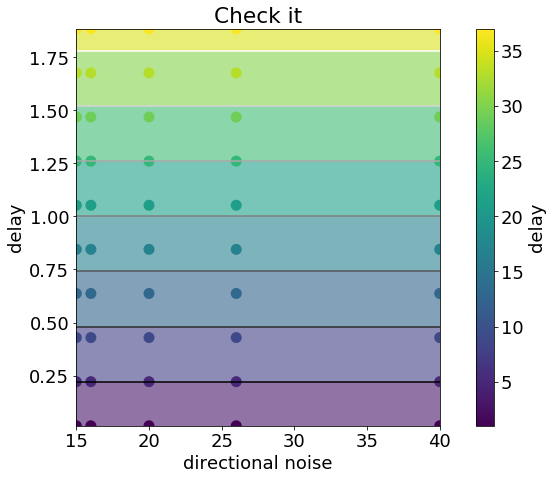

In [8]:
plotwave = np.zeros((len(allimportant[7,:]),3))
plotwave[:,0] = allimportant[2,:]
plotwave[:,1] = delaywave
plotwave[:,2] = allimportant[1,:]
if plotwave[-1,0] < plotwave[0,0]: 
    plotwave = plotwave[plotwave[:,1].argsort(kind='mergesort')]
    plotwave = plotwave[plotwave[:,0].argsort(kind='mergesort')]

ix = plotwave[:,0] 
idelayN = plotwave[:,1] 
idelay = allimportant[5,:]
ivin = plotwave[:,2] 
istart = 0
iend = num
ixname = str('directional noise')
iyname = str('delay')
ivname = str('delay')
ititlename = str('Check it')
isavename = str('Test')
imaxor = True
plotit(ix,idelayN,idelay,ivin,istart,iend,ixname,iyname,ivname,ititlename,isavename,imaxor,border = False,dots = True,both = False,background=True,xaxislog = False)   

delay =  1.68 s - noise =  0.42  - min Mean distance to the CoM [µm] =  5.38


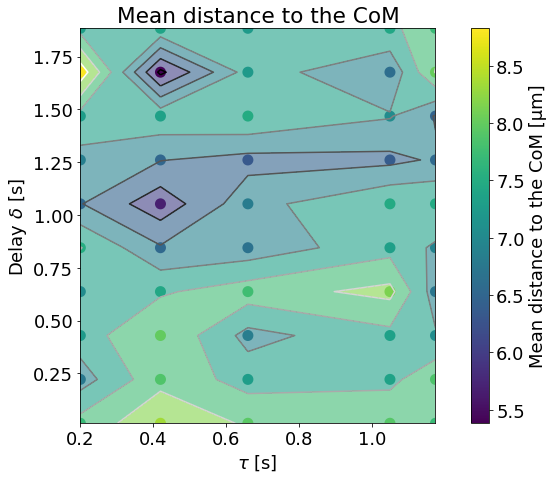

In [9]:
plotwave = np.zeros((len(allimportant[7,:]),3))
plotwave[:,0] = meandrot
plotwave[:,1] = delaywave
plotwave[:,2] = allimportant[4,:]
if plotwave[-1,0] < plotwave[0,0]: 
    plotwave = plotwave[plotwave[:,1].argsort(kind='mergesort')]
    plotwave = plotwave[plotwave[:,0].argsort(kind='mergesort')]

ix = plotwave[:,0]#allimportant[4,start:end]#np.sqrt(1/allimportant[6,:])#
idelayN = plotwave[:,1]
idelay = allimportant[1,:]
ivin = plotwave[:,2]#test#
istart = 0
iend = num
ixname = str(r'$\tau$ [s] ')
iyname = str(r'Delay $\delta$ [s]')
ivname = str('Mean distance to the CoM [µm]')
ititlename = str('Mean distance to the CoM')
isavename = str('a Mean distance to the CoM')
imaxor = False
plotit(ix,idelayN,idelay,ivin,istart,iend,ixname,iyname,ivname,ititlename,isavename,imaxor,border = False,dots = True,both = False, background = True,xaxislog = False)   

delay =  1.68 s - noise =  0.2  - min Mean sensed intensity [a.u.] =  0.32


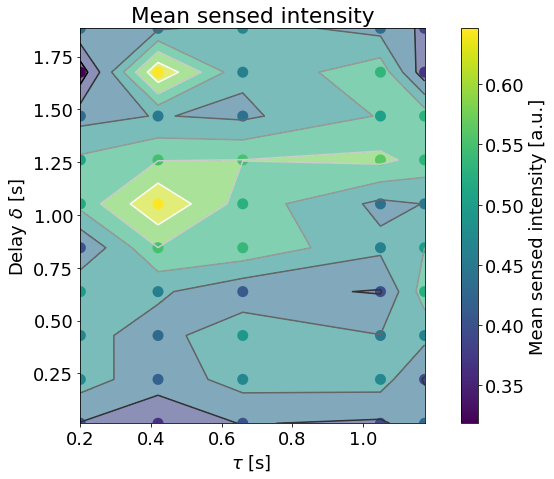

In [10]:
plotwave = np.zeros((len(allimportant[7,:]),3))
plotwave[:,0] = meandrot
plotwave[:,1] = delaywave
plotwave[:,2] = allimportant[5,:]
if plotwave[-1,0] < plotwave[0,0]: 
    plotwave = plotwave[plotwave[:,1].argsort(kind='mergesort')]
    plotwave = plotwave[plotwave[:,0].argsort(kind='mergesort')]

ix = plotwave[:,0]#allimportant[4,start:end]#np.sqrt(1/allimportant[6,:])#
idelayN = plotwave[:,1]
idelay = allimportant[1,:]
ivin = plotwave[:,2]#test#
istart = 0
iend = num
ixname = str(r'$\tau$ [s] ')
iyname = str(r'Delay $\delta$ [s]')
ivname = str('Mean sensed intensity [a.u.]')
ititlename = str('Mean sensed intensity')
isavename = str('a Mean sensed intensity')
imaxor = False
plotit(ix,idelayN,idelay,ivin,istart,iend,ixname,iyname,ivname,ititlename,isavename,imaxor,border = False,dots = True,both = False, background = True,xaxislog = False)   

delay =  1.68 s - noise =  0.2  - min Cluster formation [%] =  0.71


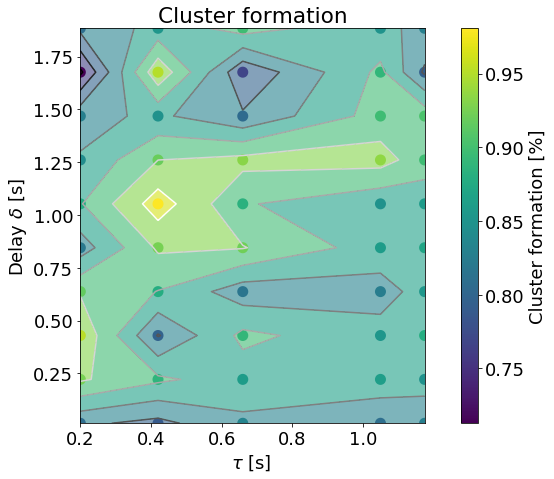

In [11]:
plotwave = np.zeros((len(allimportant[7,:]),3))
plotwave[:,0] = meandrot
plotwave[:,1] = delaywave
plotwave[:,2] = allimportant[6,:]
if plotwave[-1,0] < plotwave[0,0]: 
    plotwave = plotwave[plotwave[:,1].argsort(kind='mergesort')]
    plotwave = plotwave[plotwave[:,0].argsort(kind='mergesort')]

ix = plotwave[:,0]#allimportant[4,start:end]#np.sqrt(1/allimportant[6,:])#
idelayN = plotwave[:,1]
idelay = allimportant[1,:]
ivin = plotwave[:,2]#test#
istart = 0
iend = num
ixname = str(r'$\tau$ [s] ')
iyname = str(r'Delay $\delta$ [s]')
ivname = str('Cluster formation [%]')
ititlename = str('Cluster formation')
isavename = str('a Cluster formation')
imaxor = False
plotit(ix,idelayN,idelay,ivin,istart,iend,ixname,iyname,ivname,ititlename,isavename,imaxor,border = False,dots = True,both = False, background = True,xaxislog = False)   

delay =  1.68 s - noise =  0.42  - min Mean particle-particle distance [µm] =  8.45


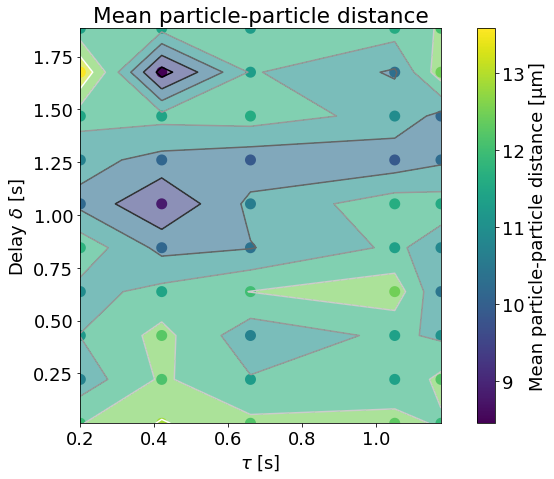

In [12]:
plotwave = np.zeros((len(allimportant[7,:]),3))
plotwave[:,0] = meandrot
plotwave[:,1] = delaywave
plotwave[:,2] = allimportant[8,:]
if plotwave[-1,0] < plotwave[0,0]: 
    plotwave = plotwave[plotwave[:,1].argsort(kind='mergesort')]
    plotwave = plotwave[plotwave[:,0].argsort(kind='mergesort')]

ix = plotwave[:,0]#allimportant[4,start:end]#np.sqrt(1/allimportant[6,:])#
idelayN = plotwave[:,1]
idelay = allimportant[1,:]
ivin = plotwave[:,2]#test#
istart = 0
iend = num
ixname = str(r'$\tau$ [s] ')
iyname = str(r'Delay $\delta$ [s]')
ivname = str('Mean particle-particle distance [µm]')
ititlename = str('Mean particle-particle distance')
isavename = str('a Mean particle-particle distance')
imaxor = False
plotit(ix,idelayN,idelay,ivin,istart,iend,ixname,iyname,ivname,ititlename,isavename,imaxor,border = False,dots = True,both = False, background = True,xaxislog = False)   

delay =  0.64 s - noise =  1.18  - min Count outside  =  -0.25
delay =  0.84 s - noise =  1.18  - min Count outside  =  -0.25
delay =  1.05 s - noise =  1.18  - min Count outside  =  -0.25


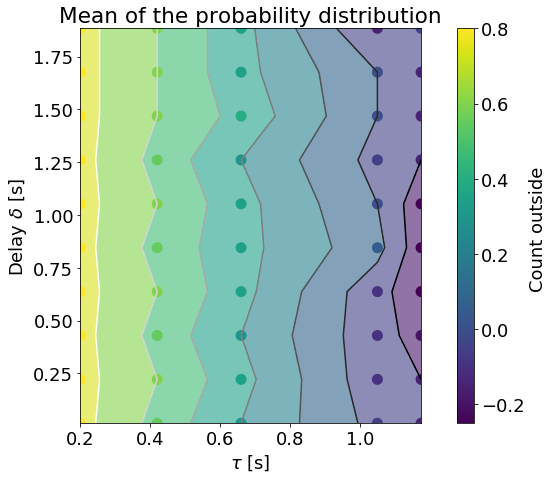

In [13]:
plotwave = np.zeros((len(allimportant[7,:]),3))
plotwave[:,0] = meandrot
plotwave[:,1] = delaywave
plotwave[:,2] = 1-allimportant[3,:]
if plotwave[-1,0] < plotwave[0,0]: 
    plotwave = plotwave[plotwave[:,1].argsort(kind='mergesort')]
    plotwave = plotwave[plotwave[:,0].argsort(kind='mergesort')]

ix = plotwave[:,0]#allimportant[4,start:end]#np.sqrt(1/allimportant[6,:])#
idelayN = plotwave[:,1]
idelay = allimportant[5,:]
ivin = plotwave[:,2]
istart = 0
iend = num
ixname = str(r'$\tau$ [s] ')
iyname = str(r'Delay $\delta$ [s]')
ivname = str('Count outside ')
ititlename = str('Mean of the probability distribution')
isavename = str('Count outside')
imaxor = False
plotit(ix,idelayN,idelay,ivin,istart,iend,ixname,iyname,ivname,ititlename,isavename,imaxor,border = False,dots = True,both = False,background=True,xaxislog = False)   

/Users/alex/anaconda/lib/python3.5/site-packages/matplotlib/contour.py:1533: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/Users/alex/anaconda/lib/python3.5/site-packages/matplotlib/contour.py:1534: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/Users/alex/anaconda/lib/python3.5/site-packages/matplotlib/contour.py:1176: RuntimeWarning: invalid value encountered in greater
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
/Users/alex/anaconda/lib/python3.5/site-packages/matplotlib/contour.py:1176: RuntimeWarning: invalid value encountered in less
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
/Users/alex/anaconda/lib/python3.5/site-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


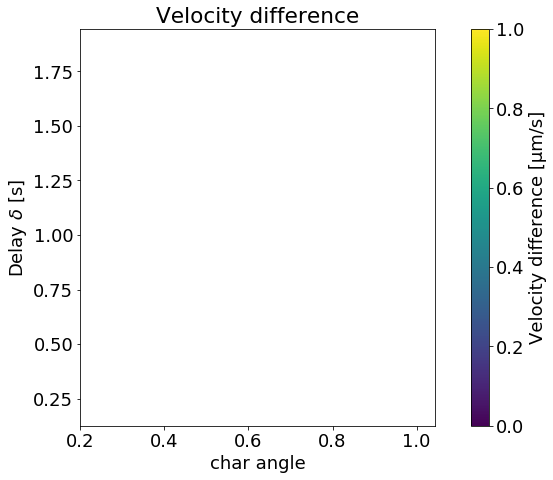

In [24]:
ix = meandrot#allimportant[4,start:end]#
idelayN = delaywave
idelay = allimportant[5,:]
ivin = allimportant[23,:]
istart = 0
iend = num
ixname = str('char angle')
ivname = str('Velocity difference [µm/s]')
ititlename = str('Velocity difference')
isavename = str('Velocity difference')
imaxor = False
plotit(ix,idelayN,idelay,ivin,istart,iend,ixname,iyname,ivname,ititlename,isavename,imaxor,border = False,dots = True,both = False,background=True,xaxislog = False)   

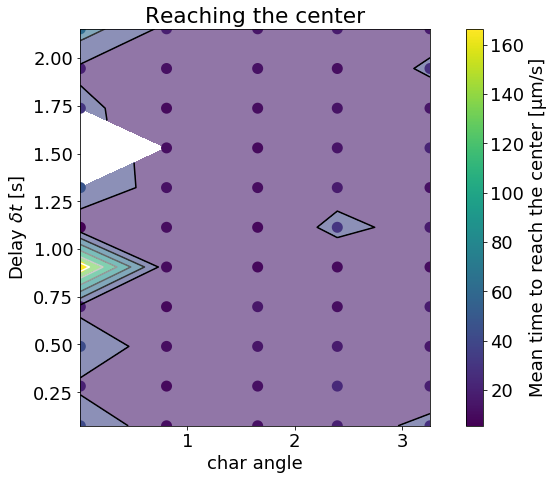

delay =  1.11 s - noise =  0.01  - min Mean time to reach the center [µm/s] =  5.43


In [13]:
ix = meandrot#allimportant[4,start:end]#
idelayN = delaywave
idelay = allimportant[5,:]
ivin = allimportant[20,:]
istart = 0
iend = num
ixname = str('char angle')
ivname = str('Mean time to reach the center [µm/s]')
ititlename = str('Reaching the center')
isavename = str('Time reaching the center')
imaxor = False
plotit(ix,idelayN,idelay,ivin,istart,iend,ixname,ivname,ititlename,isavename,imaxor,border = False,dots = True,both = False)   

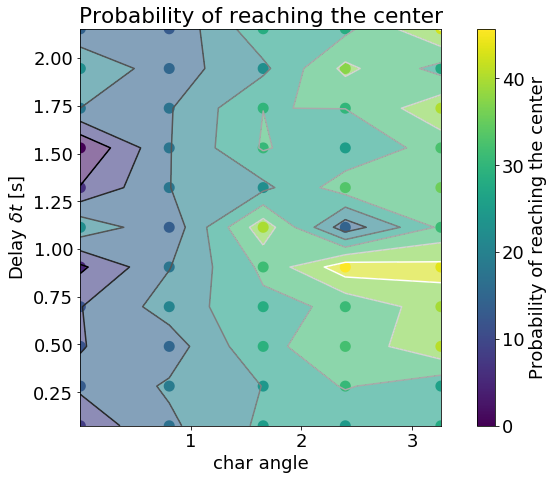

delay =  0.91 s - noise =  2.4  - max Probability of reaching the center =  0.0


In [14]:
ix = meandrot#allimportant[4,start:end]#
idelayN = delaywave
idelay = allimportant[5,:]
ivin = allimportant[21,:]
istart = 0
iend = num
ixname = str('char angle')
ivname = str('Probability of reaching the center')
ititlename = str('Probability of reaching the center')
isavename = str('Probability reaching the center')
imaxor = True
plotit(ix,idelayN,idelay,ivin,istart,iend,ixname,ivname,ititlename,isavename,imaxor,border = False,dots = True,both = False)   

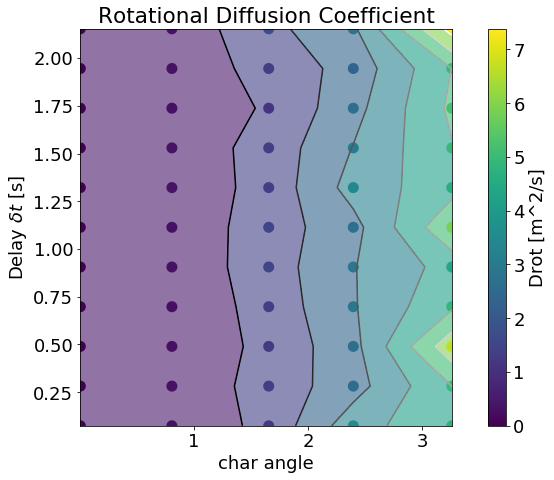

delay =  2.15 s - noise =  3.26  - max Drot [m^2/s] =  0.0


In [15]:
#0 - mean distance to center, 1 - boundary hits, 2 - mean angle change, 3 - countin, 4 - noise, 5 - delay, 
#6 - reorientation time, 7 - mean of the propability, 8 - sd density, 9/10 - Drot/err, 11/12 - Drotexp/err, 
#13/14 - ptime/err, 15/16 - plength/err, 17/18 - radialdistmore in/out - 19 - Vaverage
ix = meandrot#allimportant[4,start:end]#
idelayN = delaywave
idelay = allimportant[5,:]
ivin = allimportant[9,:]
istart = 0
iend = num
ixname = str('char angle')
ivname = str('Drot [m^2/s]')
ititlename = str('Rotational Diffusion Coefficient')
isavename = str('Rotational Diffusion Coefficient')
imaxor = True
plotit(ix,idelayN,idelay,ivin,istart,iend,ixname,ivname,ititlename,isavename,imaxor,border = False,dots = True,both = False)   

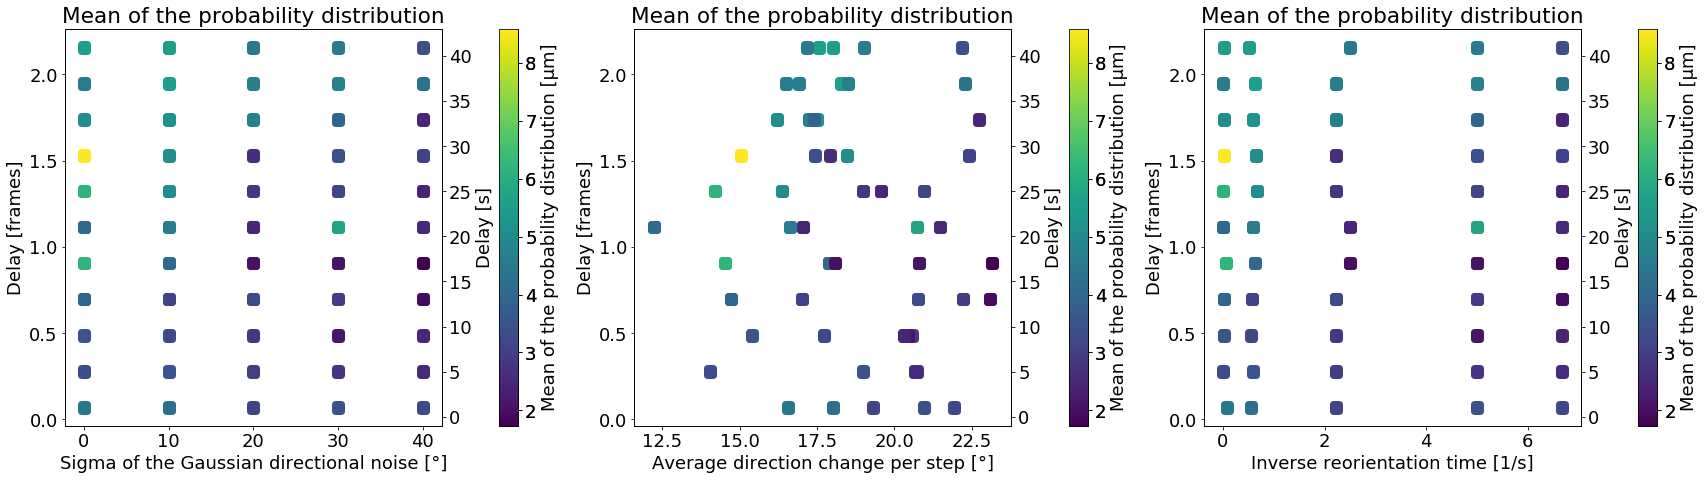

delay =  0.905433912317  - noise =  0.0  - min distance =  0.208932802


In [16]:
start = 0
x1 = allimportant[2,start:]
x2 = allimportant[4,start:]#
x3 = 1/allimportant[6,start:]
y = delaywave[start:]
y2 = allimportant[5,start:]
v = allimportant[7,start:]

xwave = [x2,x1,x3]
fig, ax1 = plt.subplots(figsize=(24,7))
for i in range(3):
    x = xwave[i]
    ax = plt.subplot(1,3,i+1)
    im = ax.scatter(x,y,c=v,linewidths=7,marker='s')
    if i == 0: ax.set_xlabel('Sigma of the Gaussian directional noise [°]')
    if i == 1: ax.set_xlabel('Average direction change per step [°]')
    if i == 2: ax.set_xlabel('Inverse reorientation time [1/s]')
    ax.set_ylabel('Delay [frames]')
    ax.tick_params(axis='y')
    ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
    im2 = ax2.scatter(x,y2,c=v,linewidths=7,marker='s')
    ax2.set_ylabel('Delay [s]')  # we already handled the x-label with ax1
    ax2.tick_params(axis='y')
    plt.title('Mean of the probability distribution')

    divider = make_axes_locatable(ax)
    divider2 = make_axes_locatable(ax2)
    cax = divider.append_axes("right", size="5%", pad=0.8)
    cax2 = divider2.append_axes("right", size="5%", pad=0.8)

    plt.colorbar(im, cax=cax)
    plt.colorbar(im2, cax=cax2)
    plt.ylabel('Mean of the probability distribution [µm]')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('oldMeanprobdist.pdf', format='pdf')
plt.show()

for i in range(num):
    if allimportant[0,i] == min(allimportant[0,:]):        
        print('delay = ',delaywave[i],' - noise = ',anglewave[i],' - min distance = ',min(allimportant[0,:])*pxtomum)

In [32]:
anglenoise = [0,15,20,25,40]
optmeandistdelay = [22,10,16,19,4]
optmeandistvalue = [5.95,4.14,3.5,3.65,4.54]
optvelodiffdelay = [22,16,10,19,4]
optvelodiffvalue = [1.3,0.9,0.71,0.70,0.52]

anglenoise2 = [0,5,10,15,20]
optmeandistdelay2 = [19,3,7,9,25]
optmeandistvalue2 = [6.6,5.57,5.54,5.44,4.46]
optvelodiffdelay2 = [22,17,14,16,8]
optvelodiffvalue2 = [1.47,1.22,0.88,0.61,0.48]

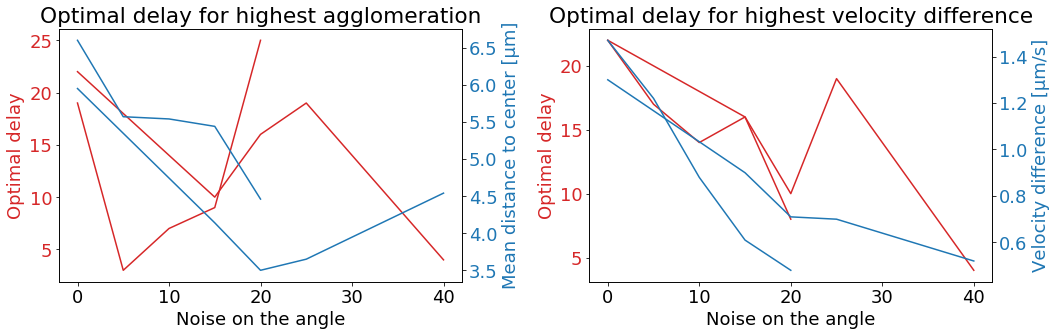

In [33]:
# Create some mock data
fig, ax = plt.subplots(figsize = (15,5))

ax1 = plt.subplot(1,2,1)
color = 'tab:red'
plt.title('Optimal delay for highest agglomeration')
ax1.set_xlabel('Noise on the angle')
ax1.set_ylabel('Optimal delay', color=color)
ax1.plot(anglenoise,optmeandistdelay, color=color, label = '#1')
ax1.plot(anglenoise2,optmeandistdelay2, color=color, label = '#2')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Mean distance to center [µm]', color=color)  # we already handled the x-label with ax1
ax2.plot(anglenoise,optmeandistvalue, color=color, label = '#1')
ax2.plot(anglenoise2,optmeandistvalue2, color=color, label = '#2')
ax2.tick_params(axis='y', labelcolor=color)

ax1 = plt.subplot(1,2,2)
color = 'tab:red'
plt.title('Optimal delay for highest velocity difference')
ax1.set_xlabel('Noise on the angle')
ax1.set_ylabel('Optimal delay', color=color)
ax1.plot(anglenoise,optvelodiffdelay, color=color)
ax1.plot(anglenoise2,optvelodiffdelay2, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Velocity difference [µm/s]', color=color)  # we already handled the x-label with ax1
ax2.plot(anglenoise,optvelodiffvalue, color=color)
ax2.plot(anglenoise2,optvelodiffvalue2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('Optimal delay all.pdf', format='pdf')
plt.show()

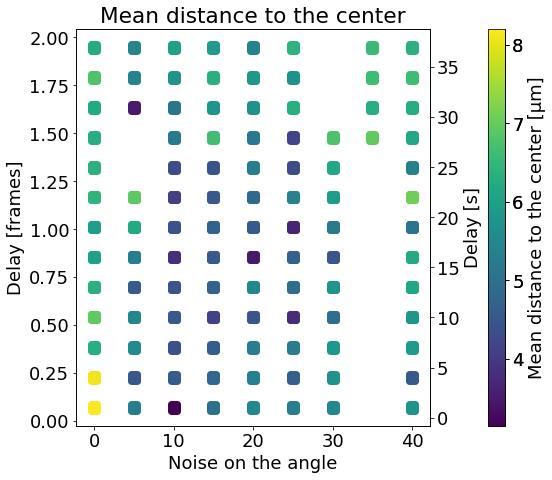

delay =  0.0734563123175  - noise =  0.0  - min distance =  0.1679087514


In [116]:
x = allimportant[4,start:end]
y = delaywave
y2 = allimportant[5,:]
v = allimportant[0,:]

fig, ax1 = plt.subplots(figsize=(8,7))
ax = plt.subplot(111)
im = ax.scatter(x,y,c=v,linewidths=7,marker='s')
ax.set_xlabel('Noise on the angle')
ax.set_ylabel('Delay [frames]')
ax.tick_params(axis='y')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
im2 = ax2.scatter(x,y2,c=v,linewidths=7,marker='s')
ax2.set_ylabel('Delay [s]')  # we already handled the x-label with ax1
ax2.tick_params(axis='y')
plt.title('Mean distance to the center')

divider = make_axes_locatable(ax)
divider2 = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.8)
cax2 = divider2.append_axes("right", size="5%", pad=0.8)

plt.colorbar(im, cax=cax)
plt.colorbar(im2, cax=cax2)
plt.ylabel('Mean distance to the center [µm]')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('Mean distance to the center.pdf', format='pdf')
plt.show()

for i in range(num):
    if allimportant[0,i] == min(allimportant[0,:]):        
        print('delay = ',delaywave[i],' - noise = ',anglewave[i],' - min distance = ',min(allimportant[0,:])*pxtomum)

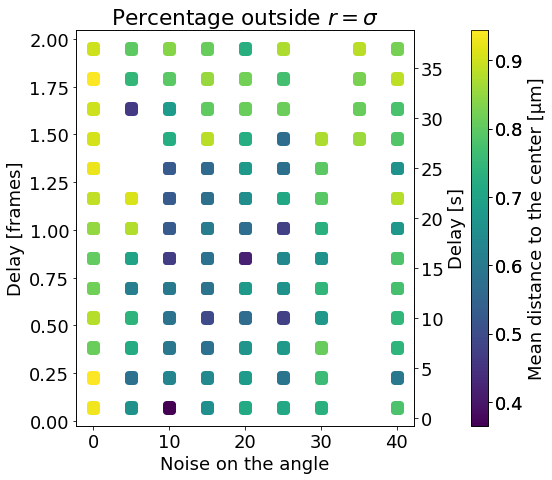

delay =  0.0734563123175  - noise =  0.0  - min percentage =  0.365


In [117]:
x = allimportant[4,start:end]
y = delaywave
y2 = allimportant[5,:]
v = 1-allimportant[3,:]

fig, ax1 = plt.subplots(figsize=(8,7))
ax = plt.subplot(111)
im = ax.scatter(x,y,c=v,linewidths=7,marker='s')
ax.set_xlabel('Noise on the angle')
ax.set_ylabel('Delay [frames]')
ax.tick_params(axis='y')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
im2 = ax2.scatter(x,y2,c=v,linewidths=7,marker='s')
ax2.set_ylabel('Delay [s]')  # we already handled the x-label with ax1
ax2.tick_params(axis='y')
plt.title('Percentage outside $r = \sigma$')

divider = make_axes_locatable(ax)
divider2 = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.8)
cax2 = divider2.append_axes("right", size="5%", pad=0.8)

plt.colorbar(im, cax=cax)
plt.colorbar(im2, cax=cax2)
plt.ylabel('Mean distance to the center [µm]')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('Percentage outside.pdf', format='pdf')
plt.show()

for i in range(num):
    if allimportant[3,i] == max(allimportant[3,:]):        
        print('delay = ',delaywave[i],' - noise = ',anglewave[i],' - min percentage = ',1-max(allimportant[3,:]))

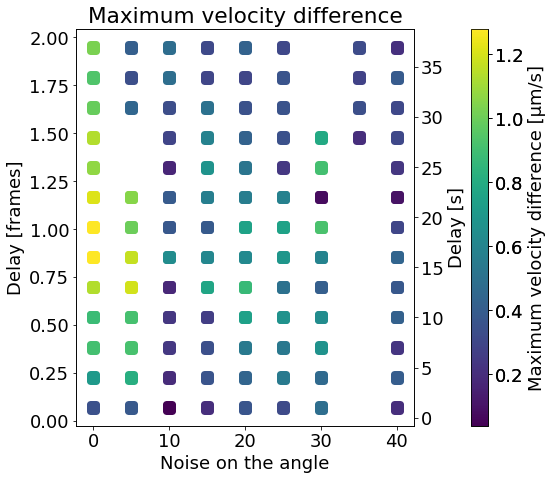

delay =  0.0734563123175  - noise =  0.0  - min percentage =  0.365


In [121]:
x = allimportant[4,start:end]
y = delaywave
y2 = allimportant[5,:]
v = allimportant[23,:]

fig, ax1 = plt.subplots(figsize=(8,7))
ax = plt.subplot(111)
im = ax.scatter(x,y,c=v,linewidths=7,marker='s')
ax.set_xlabel('Noise on the angle')
ax.set_ylabel('Delay [frames]')
ax.tick_params(axis='y')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
im2 = ax2.scatter(x,y2,c=v,linewidths=7,marker='s')
ax2.set_ylabel('Delay [s]')  # we already handled the x-label with ax1
ax2.tick_params(axis='y')
plt.title('Maximum velocity difference')

divider = make_axes_locatable(ax)
divider2 = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.8)
cax2 = divider2.append_axes("right", size="5%", pad=0.8)

plt.colorbar(im, cax=cax)
plt.colorbar(im2, cax=cax2)
plt.ylabel('Maximum velocity difference [µm/s]')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('Vdiff.pdf', format='pdf')
plt.show()

for i in range(num):
    if allimportant[3,i] == max(allimportant[3,:]):        
        print('delay = ',delaywave[i],' - noise = ',anglewave[i],' - min percentage = ',1-max(allimportant[3,:]))

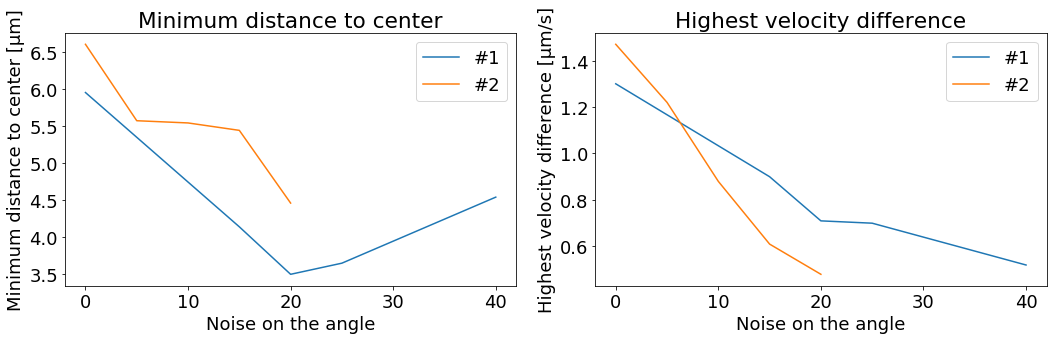

In [37]:
# Create some mock data
fig, ax = plt.subplots(figsize = (15,5))

ax1 = plt.subplot(1,2,1)
plt.plot(anglenoise,optmeandistvalue, label = '#1')
plt.plot(anglenoise2,optmeandistvalue2, label = '#2')
plt.title('Minimum distance to center')
plt.xlabel('Noise on the angle')
plt.ylabel('Minimum distance to center [µm]')
plt.legend()

ax1 = plt.subplot(1,2,2)
plt.plot(anglenoise,optvelodiffvalue, label = '#1')
plt.plot(anglenoise2,optvelodiffvalue2, label = '#2')
plt.title('Highest velocity difference')
plt.xlabel('Noise on the angle')
plt.ylabel('Highest velocity difference [µm/s]')
plt.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('Optimal delay all.pdf', format='pdf')
plt.show()